In [1]:
from peak_warming_calculator import *
from peak_warming_calculator_separate_r import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt

In [3]:
import time

### MAC curve variables:
- P_50
- s
- P_100

### Economic variables:
- D0
- gamma
- alpha (discount factor)
- g (consumption growth rate)

## Varying MAC curve parameters

In [4]:
# Define the model inputs
problem = {
'num_vars': 3,
'names': ['P_h', 's', 'P_100'],
'bounds': [[50, 75],
[0.055, 0.06],
[100, 500]]
}
# Generate samples
param_values = saltelli.sample(problem, 16)

- note: 8 runs -> ~27s
- formula for num. of runs: N(2D+2)
- N=64: 64(2(3)+2) = 3072 runs -> 64*27s ~ 30min

In [11]:
P_100_list = []

for i in range(len(param_values)):
    P_100_list.append(param_values[i][2])

In [8]:
# Y = np.zeros([param_values.shape[0]])

# consumption_growth = 0.020
# consumption_discount = consumption_growth + 0.015

# for i in range(len(param_values)):
#     if i%8 == 0:
#         print(i)
#         t = time.localtime()
#         current_time = time.strftime("%H:%M:%S", t)
#         print(current_time)
        
#     Y[i] = peak_warming_calculator(P_h=param_values[i][0], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=consumption_discount)


In [16]:
def vary_consumption_growth(consumption_growth):
    Y = np.zeros([param_values.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)

        Y[i] = peak_warming_calculator(P_h=param_values[i][0], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=consumption_discount)
    return Y

In [17]:
consumption_growth_array = np.linspace(0.02, 0.035, 4)

In [70]:
# test = vary_consumption_growth(0.02)

In [69]:
# plt.scatter(P_100_list, test, label="0.02")
# plt.scatter(P_100_list, Y_0p02, label="0.02")

In [24]:
Y_array = []

for i in range(len(consumption_growth_array)):
    Y_array.append(vary_consumption_growth(consumption_growth_array[i]))
    

0
15:03:45


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:205: RuntimeWarning: divide by zero encountered in power
  A = Am/(1 + ((P - P0)/(P_h - P0))**(-s/r))


8
15:04:07
16
15:04:29
24
15:04:52
32
15:05:13
40
15:05:34
48
15:05:55
56
15:06:15
64
15:06:35
72
15:06:55
80
15:07:15
88
15:07:35
96
15:07:56
104
15:08:16
112
15:08:36
120
15:08:56
0
15:09:16
8
15:09:36
16
15:09:56
24
15:10:16
32
15:10:36
40
15:10:57
48
15:11:17
56
15:11:37
64
15:11:57
72
15:12:17
80
15:12:37
88
15:12:57
96
15:13:17
104
15:13:37
112
15:13:57
120
15:14:17
0
15:14:37
8
15:14:57
16
15:15:17
24
15:15:37
32
15:15:57
40
15:16:17
48
15:16:37
56
15:16:57
64
15:17:17
72
15:17:37
80
15:17:57
88
15:18:17
96
15:18:37
104
15:18:57
112
15:19:17
120
15:19:37
0
15:19:57
8
15:20:17
16
15:20:37
24
15:20:57
32
15:21:17
40
15:21:37
48
15:21:57
56
15:22:18
64
15:22:38
72
15:22:58
80
15:23:18
88
15:23:38
96
15:23:58
104
15:24:18
112
15:24:38
120
15:24:58


(1.0, 2.5)

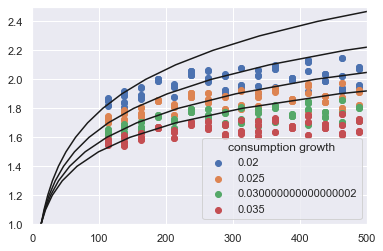

In [56]:
for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=consumption_growth_array[i])

# plt.legend()


# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.5*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 2.5)

In [31]:
# np.savetxt("parameter_sensitivity_runs/Y_array_r_is_discount", Y_array, delimiter=",")

In [42]:
# np.savetxt("parameter_sensitivity_runs/P_100_16", P_100_list, delimiter=",")

Text(0.5, 1.0, 'r is discount rate')

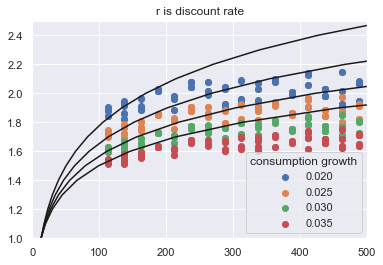

In [89]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[0], label="0.020")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[1], label="0.025")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[2], label="0.030")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[3], label="0.035")

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.5*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 2.5)
plt.title("r is discount rate")

## r is fixed

In [58]:
def vary_consumption_growth_r_fixed(consumption_growth):
    Y = np.zeros([param_values.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)

        Y[i] = peak_warming_calculator(P_h=param_values[i][0], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=0.04)
    return Y

In [68]:
Y_array = []

for i in range(len(consumption_growth_array)):
    Y_array.append(vary_consumption_growth_r_fixed(consumption_growth_array[i]))
    

In [62]:
for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=consumption_growth_array[i])

In [49]:
# np.savetxt("parameter_sensitivity_runs/Y_array_r_not_discount", Y_array, delimiter=",")

Text(0.5, 1.0, 'r is not discount rate')

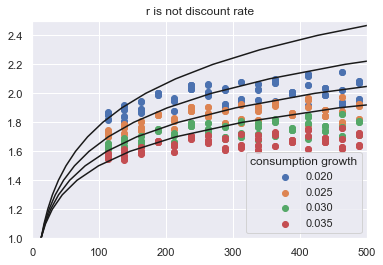

In [90]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[0], label="0.020")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[1], label="0.025")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[2], label="0.030")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[3], label="0.035")

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.5*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 2.5)
plt.title("r is not discount rate")

## Comparing the Two

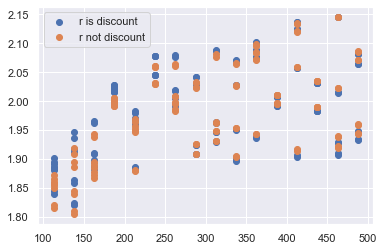

In [53]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[0], label="r is discount")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[0], label="r not discount")

plt.legend()

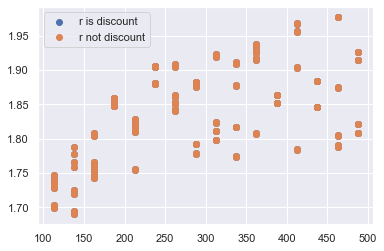

In [72]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[1], label="r is discount")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[1], label="r not discount")

plt.legend()

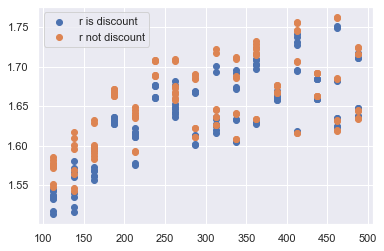

In [54]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[3], label="r is discount")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[3], label="r not discount")

plt.legend()

## Sobol Analysis

In [80]:
# 
Y_data = genfromtxt('parameter_sensitivity_runs/Y_array_r_is_discount', delimiter=',')[0]

# Y_data = genfromtxt("parameter_sensitivity_runs/Y_array_r_is_discount")

In [81]:
Y_data

array([1.90803599, 2.04194324, 1.90836661, 1.93254789, 1.93406119,
       2.08105255, 2.04117531, 2.0818034 , 2.06394488, 1.94719948,
       2.06485917, 2.03026176, 2.02981318, 1.92418233, 1.94862629,
       1.92450928, 2.01503292, 2.02430147, 2.0192397 , 2.01503292,
       2.0192397 , 2.02430147, 2.02871005, 2.02871005, 1.99126619,
       2.00722941, 1.99366389, 1.99126619, 1.99366389, 2.00722941,
       2.00925073, 2.00925073, 2.03179035, 1.98383717, 2.03155319,
       2.03179035, 2.03155319, 1.98383717, 1.9834997 , 1.9834997 ,
       2.07749864, 2.04513694, 2.07811913, 2.07749864, 2.07811913,
       2.04513694, 2.04563847, 2.04563847, 2.06943913, 1.89967187,
       2.07031131, 1.93694011, 1.94600053, 1.82010665, 1.89709628,
       1.82474105, 1.86341896, 1.91776832, 1.85876599, 1.95048138,
       1.95180114, 2.02863301, 1.91155206, 2.02871636, 1.93094804,
       2.08614038, 1.92927786, 1.93977114, 1.93678807, 2.10078389,
       2.08908295, 2.10203302, 1.88642733, 1.84528101, 1.88075

In [82]:
Si = sobol.analyze(problem, Y_data, print_to_console=True)

             ST   ST_conf
P_h    0.760404  0.467402
s      0.000564  0.000380
P_100  0.377137  0.329560
             S1   S1_conf
P_h    1.051108  0.652675
s     -0.003719  0.015351
P_100  0.344316  0.474884
                    S2   S2_conf
(P_h, s)     -0.361455  0.511555
(P_h, P_100) -0.607737  0.607065
(s, P_100)   -0.002870  0.030904


In [84]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

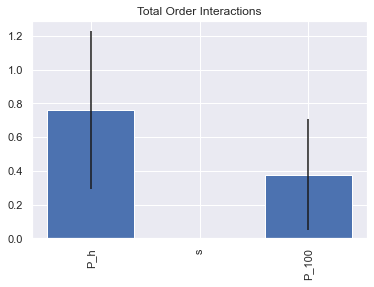

In [86]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

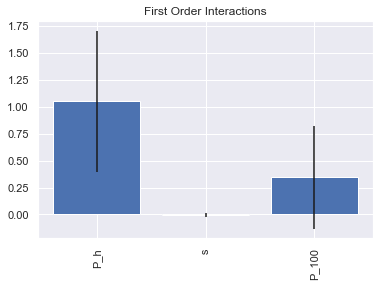

In [87]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

In [83]:
# Y_array

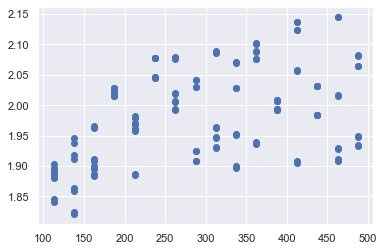

In [10]:
plt.scatter(P_100_list, Y_0p02, label="0.02")

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

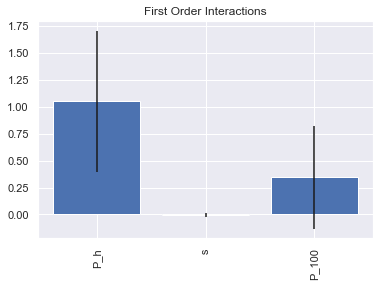

In [85]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

In [32]:
# np.savetxt("parameter_sensitivity_runs/sd", Y, delimiter=",")

In [33]:
P_100_list = []

for i in range(len(param_values)):
    P_100_list.append(param_values[i][2])


In [34]:
# np.savetxt("P_100_64", P_100_list, delimiter=",")

In [35]:
# Y_file = pd.read_csv("0p02_64", header=None)
# plt.scatter(P_100_list, Y_file)
# Y_file = pd.read_csv("0p025_64", header=None)
# plt.scatter(P_100_list, Y_file)
# Y_file = pd.read_csv("0p03_64", header=None)
# plt.scatter(P_100_list, Y_file)
# Y_file = pd.read_csv("0p035_64", header=None)
# plt.scatter(P_100_list, Y_file)

(1.0, 2.5)

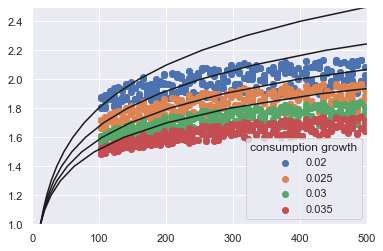

In [64]:
W0 = 75*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.5*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]


plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64", header=None), label="0.025")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p030_64", header=None), label="0.03")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p035_64", header=None), label="0.035")

plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 2.5)

(1.0, 2.5)

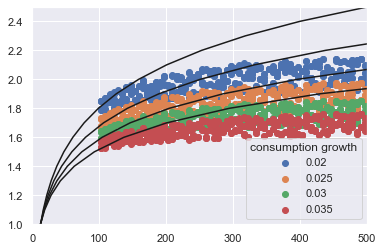

In [65]:
W0 = 75*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.5*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]


plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64_fixed_r", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64_fixed_r", header=None), label="0.025")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p030_64_fixed_r", header=None), label="0.03")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p035_64_fixed_r", header=None), label="0.035")
# plt.scatter(pd.read_csv("P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64", header=None), label="0.035")


plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 2.5)

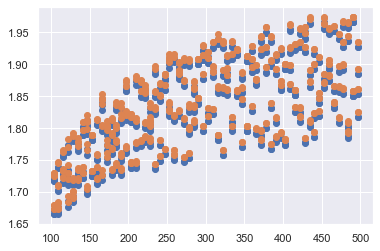

In [67]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64_fixed_r", header=None), label="0.02")


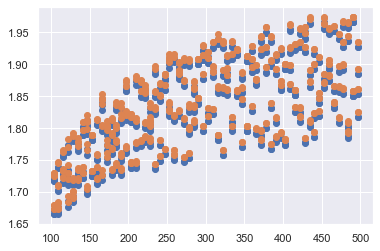

In [76]:
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64", header=None), label="0.025")
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p030_64", header=None), label="0.03")
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p035_64", header=None), label="0.035")


# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64_fixed_r", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64_fixed_r", header=None), label="0.025")
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p030_64_fixed_r", header=None), label="0.03")
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p035_64_fixed_r", header=None), label="0.035")

In [60]:
Y_data = genfromtxt('parameter_sensitivity_runs/0p020_64_fixed_r', delimiter=',')

In [61]:
Si = sobol.analyze(problem, Y_data, print_to_console=True)

             ST   ST_conf
P_h    0.487470  0.189721
s      0.001107  0.000882
P_100  0.520983  0.164944
             S1   S1_conf
P_h    0.411951  0.234609
s     -0.001460  0.012534
P_100  0.528034  0.217213
                    S2   S2_conf
(P_h, s)      0.036045  0.301888
(P_h, P_100)  0.028703  0.340543
(s, P_100)    0.002415  0.017980


In [62]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

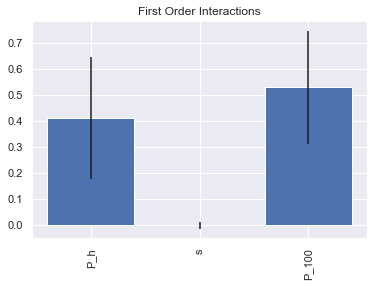

In [63]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

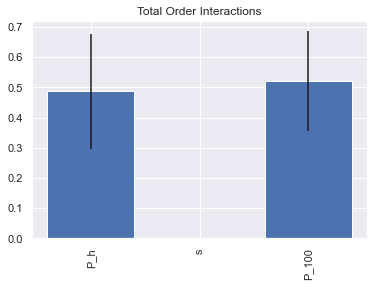

In [64]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

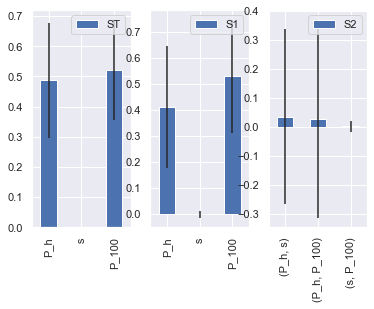

In [65]:
Si.plot()

In [ ]:
# Define the model inputs
problem = {
'num_vars': 3,
'names': ['P_50', 's', 'P_100'],
'bounds': [[50, 75],
[0.055, 0.06],
[100, 500]]
}
# Generate samples
param_values = saltelli.sample(problem, 8)

In [ ]:
Y = np.zeros([param_values.shape[0]])

consumption_growth = 0.015
consumption_discount = consumption_growth + 0.015

for i in range(len(param_values)):
    if i%8 == 0:
        print(i)
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        print(current_time)
        
    Y[i] = peak_warming_calculator(P_50=param_values[i][0], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=consumption_discount)


In [61]:
def function(consumption_growth):
    Y = np.zeros([param_values.shape[0]])

    growth_adjusted_discount_function = consumption_growth + 0.015

    for i in range(len(param_values)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)

        Y[i] = peak_warming_calculator(P_50=param_values[i][0], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=growth_adjusted_discount_function)
    
#     filename = "Y_0p" + str(consumption_growth)[-2:]
#     np.savetxt(filename, Y, delimiter=",")
    
    plt.scatter(P_100_list, Y)

0
14:25:59
8
14:26:25
16
14:26:53
24
14:27:20
32
14:27:48
40
14:28:15
48
14:28:43
56
14:29:09


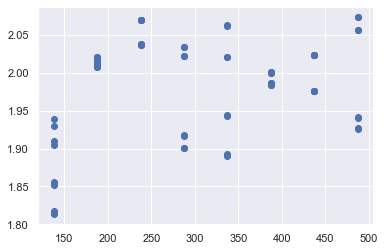

In [62]:
# function(consumption_growth=0.015)
function(consumption_growth=0.02)
# function(consumption_growth=0.025)
# function(consumption_growth=0.03)
# function(consumption_growth=0.035)

In [63]:
Y_0p02 = pd.read_csv("Y_0p25", header=None)

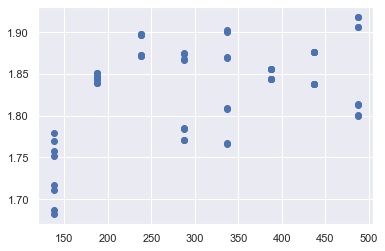

In [64]:
plt.scatter(P_100_list, Y_0p02)

In [54]:
# Define the model inputs
problem = {
'num_vars': 3,
'names': ['P_50', 's', 'P_100'],
'bounds': [[50, 75],
[0.055, 0.06],
[100, 500]]
}
# Generate samples
param_values = saltelli.sample(problem, 64)

0
13:30:04


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:206: RuntimeWarning: divide by zero encountered in power
  A = Am/(1 + ((P - P0)/(P_50 - P0))**(-s/r))


8
13:30:31
16
13:30:59
24
13:31:29
32
13:31:57
40
13:32:23
48
13:32:49
56
13:33:16
64
13:33:42
72
13:34:08
80
13:34:35
88
13:35:01
96
13:35:28
104
13:35:59
112
13:36:28
120
13:36:57
128
13:37:23
136
13:37:50
144
13:38:16
152
13:38:45
160
13:39:12
168
13:39:38
176
13:40:05
184
13:40:31
192
13:40:57
200
13:41:24
208
13:41:50
216
13:42:16
224
13:42:42
232
13:43:08
240
13:43:35
248
13:44:03
256
13:44:29
264
13:44:56
272
13:45:22
280
13:45:48
288
13:46:15
296
13:46:41
304
13:47:07
312
13:47:33
320
13:48:00
328
13:48:27
336
13:48:53
344
13:49:19
352
13:49:46
360
13:50:13
368
13:50:39
376
13:51:07
384
13:51:37
392
13:52:05
400
13:52:32
408
13:52:59
416
13:53:26
424
13:53:54
432
13:54:21
440
13:54:49
448
13:55:17
456
13:55:46
464
13:56:15
472
13:56:42
480
13:57:11
488
13:57:39
496
13:58:07
504
13:58:36


ValueError: x and y must be the same size

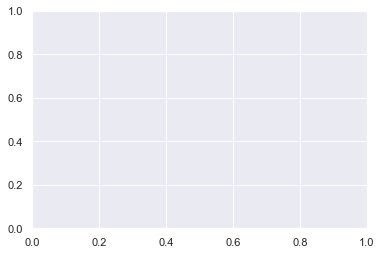

In [55]:
function(consumption_growth=0.02)

In [ ]:
Si = sobol.analyze(problem, Y, print_to_console=True)

## Parameters other than Discount Factor & Consumption Growth Rate

In [25]:
# Define the model inputs
problem = {
'num_vars': 5,
'names': ['P_h', 's', 'Am', 'D0', 'gamma'],
'bounds': [[50, 100],
[15, 25],
[1.05, 1.5],
[0.002, 0.003],
[2, 2.5]]
}
# Generate samples
param_values = saltelli.sample(problem, 256)

In [26]:
len(param_values)

3072

- note: 8 runs -> ~27s
- formula for num. of runs: N(2D+2)
- N=256: 256(2(5)+2) = 3072 runs -> 384*22s ~ 170min

In [89]:
param_values

array([[5.02929688e+01, 1.99804688e+01, 1.35498047e+00, 2.29492188e-03,
        2.38964844e+00],
       [5.53710938e+01, 1.99804688e+01, 1.35498047e+00, 2.29492188e-03,
        2.38964844e+00],
       [5.02929688e+01, 1.86523438e+01, 1.35498047e+00, 2.29492188e-03,
        2.38964844e+00],
       ...,
       [9.38476562e+01, 2.24414062e+01, 1.25830078e+00, 2.84570313e-03,
        2.10058594e+00],
       [9.38476562e+01, 2.24414062e+01, 1.25830078e+00, 2.22070313e-03,
        2.17675781e+00],
       [9.38476562e+01, 2.24414062e+01, 1.25830078e+00, 2.22070313e-03,
        2.10058594e+00]])

In [61]:
np.savetxt("param_values.csv", param_values, delimiter=",")

In [27]:
Y = np.zeros([param_values.shape[0]])

for i in range(len(param_values)):
    if i%64 == 0:
        print(i)
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        print(current_time)
        
    Y[i] = peak_warming_calculator(P_h=param_values[i][0], s=param_values[i][1], Am=param_values[i][2], D0=param_values[i][3], gamma=param_values[i][4])

0
15:20:56
64
15:24:32
128
15:28:01
192
15:31:35
256
15:35:04
320
15:38:34
384
15:42:05
448
15:45:38
512
15:49:12
576
15:52:46
640
15:56:23
704
15:59:59
768
16:03:35
832
16:07:11
896
16:10:47
960
16:14:26
1024
16:18:03
1088
16:21:39
1152
16:25:10
1216
16:28:38
1280
16:32:07
1344
16:35:35
1408
16:39:04
1472
16:42:32
1536
16:46:01
1600
16:49:29
1664
16:52:58
1728
16:56:26
1792
16:59:55
1856
17:03:24
1920
17:06:52
1984
17:10:21
2048
17:13:50
2112
17:17:19
2176
17:20:49
2240
17:24:18
2304
17:27:46
2368
17:31:15
2432
17:34:43
2496
17:38:12
2560
17:41:40
2624
17:45:08
2688
17:48:38
2752
17:52:07
2816
17:55:35
2880
17:59:04
2944
18:02:32
3008
18:06:01


In [63]:
np.savetxt("Y.csv", Y, delimiter=",")

In [64]:
Si = sobol.analyze(problem, Y, print_to_console=True)

             ST   ST_conf
P_h    0.241163  0.049401
s      0.026334  0.012869
Am     0.473002  0.092153
D0     0.084143  0.019034
gamma  0.174514  0.046489
             S1   S1_conf
P_h    0.248344  0.077551
s      0.015194  0.027129
Am     0.466365  0.108846
D0     0.080376  0.045775
gamma  0.167650  0.069637
                    S2   S2_conf
(P_h, s)     -0.016111  0.098991
(P_h, Am)    -0.021075  0.145442
(P_h, D0)    -0.013766  0.104831
(P_h, gamma) -0.000502  0.113335
(s, Am)       0.014273  0.052010
(s, D0)       0.012359  0.039592
(s, gamma)    0.003550  0.037917
(Am, D0)      0.006379  0.161615
(Am, gamma)   0.003951  0.155872
(D0, gamma)   0.008522  0.081096


In [70]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

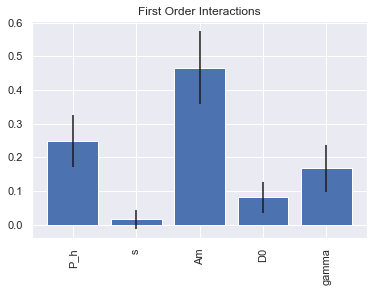

In [71]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

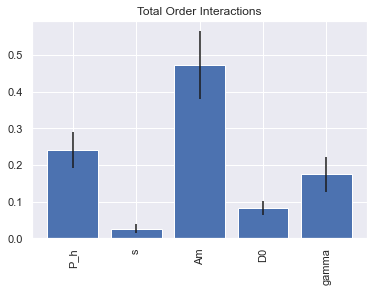

In [88]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

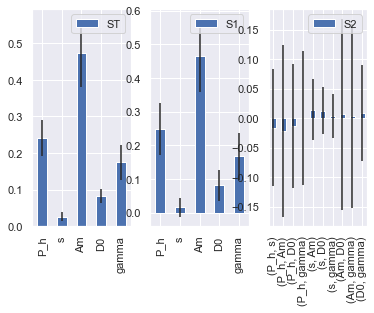

In [76]:
Si.plot()

## All Parameters

In [87]:
# Define the model inputs
problem = {
'num_vars': 7,
'names': ['P_h', 's', 'Am', 'D0', 'gamma', 'discount factor', 'consumption growth'],
'bounds': [[50, 100],
[15, 25],
[1.05, 1.5],
[0.002, 0.003],
[2, 2.5],
[0.02, 0.07],
[0.02, 0.04]]
}
# Generate samples
param_values = saltelli.sample(problem, 128)

In [88]:
len(param_values)

2048

- note: 8 runs -> ~22s
- formula for num. of runs: N(2D+2)
- N=8: 8(2(7)+2) = 128 runs -> 16*22s ~ 6min
- N=64: 64(2(7)+2) = 1024 runs -> 128*22s ~ 47min
- N=128: 128(2(7)+2) = 2048 runs -> 256*22s ~ 94min

In [90]:
Y = np.zeros([param_values.shape[0]])



for i in range(len(param_values)):
    if i%8 == 0:
        print(i)
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        print(current_time)
        
    Y[i] = peak_warming_calculator(P_h=param_values[i][0], s=param_values[i][1], Am=param_values[i][2], D0=param_values[i][3], gamma=param_values[i][4], consumption_discount=param_values[i][5], consumption_growth=param_values[i][6])

0
12:07:48


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:198: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


8
12:08:09
16
12:08:34
24
12:09:02
32
12:09:28
40
12:09:56
48
12:10:24
56
12:10:51
64
12:11:18
72
12:11:45
80
12:12:11
88
12:12:38
96
12:13:04
104
12:13:31
112
12:13:58
120
12:14:25
128
12:14:52
136
12:15:20
144
12:15:47
152
12:16:11
160
12:16:37
168
12:17:03
176
12:17:30
184
12:17:59
192
12:18:26
200
12:18:50
208
12:19:12
216
12:19:34
224
12:20:02
232
12:20:23
240
12:20:44
248
12:21:04
256
12:21:29
264
12:21:50
272
12:22:13
280
12:22:41
288
12:23:03
296
12:23:27
304
12:23:51
312
12:24:14
320
12:24:36
328
12:24:56
336
12:25:18
344
12:25:40
352
12:26:00
360
12:26:20
368
12:26:41
376
12:27:02
384
12:27:27
392
12:27:53
400
12:28:20
408
12:28:47
416
12:29:16
424
12:29:43
432
12:30:09
440
12:30:35
448
12:31:01
456
12:31:28
464
12:31:52
472
12:32:13
480
12:32:34
488
12:32:56
496
12:33:19
504
12:33:46
512
12:34:11
520
12:34:31
528
12:34:51
536
12:35:12
544
12:35:35
552
12:36:02
560
12:36:27
568
12:36:51
576
12:37:15
584
12:37:41
592
12:38:06
600
12:38:30
608
12:38:53
616
12:39:17
624
12:39:40

In [91]:
Si = sobol.analyze(problem, Y, print_to_console=True)

                          ST   ST_conf
P_h                 0.020594  0.006929
s                   0.002045  0.002329
Am                  0.036427  0.013375
D0                  0.007316  0.002406
gamma               0.016898  0.007042
discount factor     0.615299  0.160227
consumption growth  0.312551  0.087787
                          S1   S1_conf
P_h                 0.026586  0.031882
s                   0.001747  0.008309
Am                  0.017925  0.041090
D0                  0.012649  0.021208
gamma               0.012763  0.025650
discount factor     0.642608  0.199407
consumption growth  0.281530  0.125541
                                             S2   S2_conf
(P_h, s)                              -0.019404  0.054018
(P_h, Am)                             -0.020598  0.054947
(P_h, D0)                             -0.016672  0.053619
(P_h, gamma)                          -0.017117  0.052921
(P_h, discount factor)                -0.022259  0.063907
(P_h, consumption growth)   

In [92]:
total_Si, first_Si, second_Si = Si.to_df()

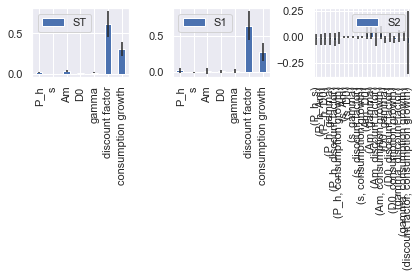

In [93]:
Si.plot()
plt.tight_layout()

In [94]:
total_Si

,ST,ST_conf
P_h,0.020594,0.006929
s,0.002045,0.002329
Am,0.036427,0.013375
D0,0.007316,0.002406
gamma,0.016898,0.007042
discount factor,0.615299,0.160227
consumption growth,0.312551,0.087787


In [95]:
total_Si.index

Index(['P_h', 's', 'Am', 'D0', 'gamma', 'discount factor',
       'consumption growth'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

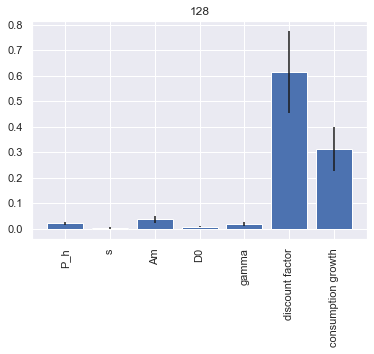

In [98]:
plt.title("128")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

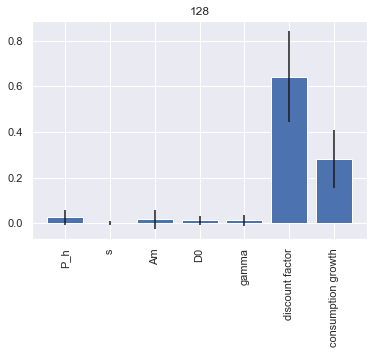

In [99]:
plt.title("128")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

In [22]:
Si

{'S1': array([ 0.0008269 , -0.01496745,  0.18418246,  0.00639928, -0.01174437,
         0.55496678,  0.77910727]),
 'S1_conf': array([0.17111052, 0.03665097, 0.28509729, 0.12564102, 0.05360042,
        0.80816551, 0.72242255]),
 'ST': array([0.02368216, 0.00094096, 0.05846661, 0.00803795, 0.00174271,
        0.8095196 , 0.39725199]),
 'ST_conf': array([0.04574729, 0.00160147, 0.05791073, 0.01270855, 0.00193785,
        0.42377558, 0.46183401]),
 'S2': array([[        nan, -0.07692704, -0.08818309, -0.09302216, -0.0684389 ,
          0.00718061, -0.01902615],
        [        nan,         nan,  0.00700224,  0.0029669 ,  0.00404023,
          0.01363693,  0.0120727 ],
        [        nan,         nan,         nan, -0.25216987, -0.25139747,
         -0.1441806 , -0.32412246],
        [        nan,         nan,         nan,         nan, -0.02308243,
         -0.01363571,  0.07035161],
        [        nan,         nan,         nan,         nan,         nan,
          0.01810385, -0.003193

In [83]:
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

In [101]:
param_values = saltelli.sample(problem, 1, calc_second_order=True)

/Users/aaron/opt/anaconda3/envs/Fairv2.0.0/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1) is equal to `2^n`.
        
  warnings.warn(msg)


In [103]:
param_values

array([[-2.55254403, -0.19634954, -0.19634954],
       [ 0.9817477 , -0.19634954, -0.19634954],
       [-2.55254403, -1.37444679, -0.19634954],
       [-2.55254403, -0.19634954,  2.94524311],
       [-2.55254403, -1.37444679,  2.94524311],
       [ 0.9817477 , -0.19634954,  2.94524311],
       [ 0.9817477 , -1.37444679, -0.19634954],
       [ 0.9817477 , -1.37444679,  2.94524311]])

In [96]:
Y = Ishigami.evaluate(param_values)

In [97]:
Y

array([3.426362  , 3.3527401 , 0.85463176, ..., 0.7979166 , 0.2301734 ,
       0.67233814])

In [98]:
Si = sobol.analyze(problem, Y, print_to_console=False)

In [99]:
print(Si['S1'])

[0.31234581 0.44299361 0.00903086]


In [100]:
Si

{'S1': array([0.31234581, 0.44299361, 0.00903086]),
 'S1_conf': array([0.0694774 , 0.05934529, 0.05299454]),
 'ST': array([0.55434535, 0.4375372 , 0.24557732]),
 'ST_conf': array([0.09325615, 0.03715347, 0.02601968]),
 'S2': array([[        nan,  0.01027382,  0.23771139],
        [        nan,         nan, -0.01460333],
        [        nan,         nan,         nan]]),
 'S2_conf': array([[       nan, 0.09681713, 0.11137362],
        [       nan,        nan, 0.06180639],
        [       nan,        nan,        nan]])}

## Sensitivity Analysis

In [11]:
Am_array = np.arange(1, 1.5, 0.1)
s_array = np.arange(15, 19, 1)

In [12]:
peak_T_list = []
Am_list = []
s_list = []
for i in range(len(Am_array)):
    print(i)
    for j in range(len(s_array)):
        peak_T_list.append(peak_warming_calculator(Am=Am_array[i], s=s_array[j]))
        Am_list.append(Am_array[i])
        s_list.append(s_array[j])

0


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:200: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


1
2
3
4


In [13]:
df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list)),
               columns =['Am', 's', 'peak_T'])

In [14]:
df

,Am,s,peak_T
0,1.0,15,2.185813
1,1.0,16,2.204075
2,1.0,17,2.223022
3,1.0,18,2.242604
4,1.1,15,2.027282
5,1.1,16,2.033403
6,1.1,17,2.040170
7,1.1,18,2.047525
8,1.2,15,1.945404
9,1.2,16,1.945631


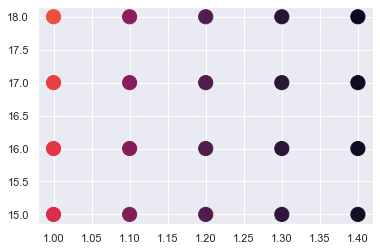

In [15]:
plt.scatter(df.Am, df.s, s=200, c=df.peak_T, vmin=1.8, vmax=2.5)  # , cmap='gray'

In [16]:
def varying_r_Ph_all_outputs(r, P_h):
    Am_array = np.arange(1, 1.5, 0.1)
    s_array = np.arange(15, 19, 1)
    
    peak_T_list = []
    SCC_forecasted_list = [] 
    forecasted_abatement_list = []
    forecasted_emissions_list = []
    T_complete_list = []
    
    Am_list = []
    s_list = []
    for i in range(len(Am_array)):
        for j in range(len(s_array)):
            peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(Am=Am_array[i], s=s_array[j], r=r, P_h=P_h, return_all_output=True)
            peak_T_list.append(peak_T)
            SCC_forecasted_list.append(SCC_forecasted)
            forecasted_abatement_list.append(forecasted_abatement)
            forecasted_emissions_list.append(forecasted_emissions)
            T_complete_list.append(T_complete)
            
            Am_list.append(Am_array[i])
            s_list.append(s_array[j])
    df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list, SCC_forecasted_list, forecasted_abatement_list, forecasted_emissions_list, T_complete_list)),
               columns =['Am', 's', 'peak_T', 'SCC_forecasted', 'forecasted_abatement', 'forecasted_emissions', 'T_complete'])
    return df

In [17]:
df_test = varying_r_Ph_all_outputs(r=20, P_h=30)

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:185: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


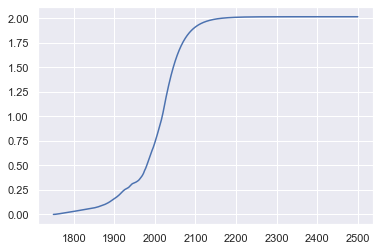

In [18]:
plt.plot(years, df_test['T_complete'][0])

In [19]:
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

df_dict = {}
keys = []
r_array = np.arange(20, 27, 3)
P_h_array = np.arange(40, 120, 20)
for i in range(len(r_array)):
    keys_const_r = []
    for j in range(len(P_h_array)):
        text = str(r_array[i]) + ',' + str(P_h_array[j])
        df_dict[text] = varying_r_Ph_all_outputs(r=r_array[i], P_h=P_h_array[j])
        keys_const_r.append(text)
    keys.append(keys_const_r)
    
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(current_time)

NameError: name 'time' is not defined

In [ ]:
r_length = len(r_array)

P_h_length = len(P_h_array)

fig, axs = plt.subplots(P_h_length, r_length)
cm = plt.cm.get_cmap('RdYlBu')
for i in range(r_length):
    print(i)
    key = keys[i]
    for j in range(P_h_length):
        ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='A$_{m}$', ylabel='s')
for ax in axs.flat:
    ax.label_outer()


In [ ]:
r_array

In [ ]:
# df_dict['20,40']

In [ ]:
for i in range(len(df_dict['20,40'])):
    label = "Am: " + str(round(df_dict['20,40']['Am'][i], 2)) + ", s: " + str(df_dict['20,40']['s'][i])
    plt.plot(years, df_dict['20,40']['T_complete'][i], label=label)

plt.xlabel('year')
plt.ylabel('T')
plt.legend(loc=2)

In [ ]:
fig, axs = plt.subplots(P_h_length, r_length)

for i in range(r_length):
    key = keys[i]
    for j in range(P_h_length):
        for k in range(len(df_dict['20,40'])):
            ax = axs[j, i].plot(years, df_dict[key[j]]['T_complete'][k])
#             ax.set_xlim([2000, 2200])
#         ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='year', ylabel='T')
    ax.set_ylim([0, 3])
for ax in axs.flat:
    ax.label_outer()



In [ ]:
keys

In [ ]:
for i in range(len(df_dict['20,40'])):
    label = "Am: " + str(round(df_dict['20,40']['Am'][i], 2)) + ", s: " + str(df_dict['20,40']['s'][i])
    plt.plot(years_forecasted, df_dict['20,40']['SCC_forecasted'][i], label=label)

plt.xlim(2000, 2100)
plt.ylim(0, 100)
plt.xlabel('year')
plt.ylabel('SCC')
plt.legend(loc=1)

In [ ]:
fig, axs = plt.subplots(P_h_length, r_length)

for i in range(r_length):
    key = keys[i]
    for j in range(P_h_length):
        for k in range(len(df_dict['20,40'])):
            ax = axs[j, i].plot(years_forecasted, df_dict[key[j]]['SCC_forecasted'][k])
#             ax.set_xlim([2000, 2200])
#         ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='year', ylabel='SCC')
    ax.set_xlim([2000, 2100])
    ax.set_ylim([0, 100])
for ax in axs.flat:
    ax.label_outer()


In [ ]:
def varying_D0_gamma_all_outputs(r, P_h):
    Am_array = np.arange(2, 1.5, 0.1)
    s_array = np.arange(15, 19, 1)
    
    peak_T_list = []
    SCC_forecasted_list = [] 
    forecasted_abatement_list = []
    forecasted_emissions_list = []
    T_complete_list = []
    
    Am_list = []
    s_list = []
    for i in range(len(Am_array)):
        for j in range(len(s_array)):
            peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(Am=Am_array[i], s=s_array[j], r=r, P_h=P_h, return_all_output=True)
            peak_T_list.append(peak_T)
            SCC_forecasted_list.append(SCC_forecasted)
            forecasted_abatement_list.append(forecasted_abatement)
            forecasted_emissions_list.append(forecasted_emissions)
            T_complete_list.append(T_complete)
            
            Am_list.append(Am_array[i])
            s_list.append(s_array[j])
    df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list, SCC_forecasted_list, forecasted_abatement_list, forecasted_emissions_list, T_complete_list)),
               columns =['Am', 's', 'peak_T', 'SCC_forecasted', 'forecasted_abatement', 'forecasted_emissions', 'T_complete'])
    return df

In [ ]:
D0_array = np.arange(2.5, 3, 0.1)*10**(-3)
gamma_array = np.arange(2, 2.3, 0.05)

In [ ]:
gamma_array

In [ ]:
peak_T_list = []
SCC_forecasted_list = [] 
forecasted_abatement_list = []
forecasted_emissions_list = []
T_complete_list = []

gamma_list = []
D0_list = []


for i in range(len(gamma_array)):
        for j in range(len(D0_array)):
            peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(gamma=gamma_array[i], D0=D0_array[j], return_all_output=True)
            peak_T_list.append(peak_T)
            SCC_forecasted_list.append(SCC_forecasted)
            forecasted_abatement_list.append(forecasted_abatement)
            forecasted_emissions_list.append(forecasted_emissions)
            T_complete_list.append(T_complete)
            
            gamma_list.append(gamma_array[i])
            D0_list.append(D0_array[j])

df = pd.DataFrame(list(zip(gamma_list, D0_list, peak_T_list, SCC_forecasted_list, forecasted_abatement_list, forecasted_emissions_list, T_complete_list)),
                  columns =['gamma', 'D0', 'peak_T', 'SCC_forecasted', 'forecasted_abatement', 'forecasted_emissions', 'T_complete'])

In [ ]:
df

In [ ]:
fig, axs = plt.subplots(1, 1)
ax = axs.scatter(df.gamma, df.D0, s=200, c=df.peak_T, vmin=1.8, vmax=2.2)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
fig.colorbar(ax, cax=cbar_ax)
axs.set_xlabel('$\gamma$')
axs.set_ylabel('D0')
# for ax in axs.flat:
#     ax.label_outer()

In [ ]:
for i in range(len(df)):
    plt.plot(years, df['T_complete'][i])

In [ ]:
for i in range(len(df)):
    if df['D0'][i] == 0.0025:
        plt.plot(years, df['T_complete'][i], label=df['gamma'][i])
        
plt.legend()

In [ ]:
for i in range(len(df)):
    if df['gamma'][i] == 2:
        plt.plot(years, df['T_complete'][i], label=df['D0'][i])

plt.legend()

In [ ]:
df

In [ ]:
def varying_r_Ph(r, P_h):
    peak_T_list = []
    Am_list = []
    s_list = []
    for i in range(len(Am_array)):
        for j in range(len(s_array)):
            peak_T_list.append(peak_warming_calculator(Am=Am_array[i], s=s_array[j], r=r, P_h=P_h))
            Am_list.append(Am_array[i])
            s_list.append(s_array[j])
    df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list)),
               columns =['Am', 's', 'peak_T'])
    return df

In [ ]:
import time

In [ ]:
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

df_dict = {}
keys = []
r_array = np.arange(20, 27, 3)
P_h_array = np.arange(30, 100, 30)
for i in range(len(r_array)):
    keys_const_r = []
    for j in range(len(P_h_array)):
        text = str(r_array[i]) + ',' + str(P_h_array[j])
        df_dict[text] = varying_r_Ph(r=r_array[i], P_h=P_h_array[j])
        keys_const_r.append(text)
    keys.append(keys_const_r)
    
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(current_time)

In [ ]:
r_length = len(r_array)

In [ ]:
P_h_length = len(P_h_array)

In [ ]:
fig, axs = plt.subplots(P_h_length, r_length)
cm = plt.cm.get_cmap('RdYlBu')
for i in range(r_length):
    print(i)
    key = keys[i]
    for j in range(P_h_length):
        ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='A$_{m}$', ylabel='s')
for ax in axs.flat:
    ax.label_outer()


5 min 20 s for 180 runs

In [ ]:
P_h_array

In [ ]:
df_dict['20,30']

gamma